验证qvalue相对而言比较稳定 没有出现中间凹陷的情况

In [ ]:
import pandas as pd
import numpy as np
import sys
import torch
sys.path.append("/data1/sunshuo/qml/HFT/HFT_04_11")
from env.env import Testing_env
from model.net import Qnet

In [ ]:
def get_action_prob(eval_net,s,info):
    x = torch.unsqueeze(torch.FloatTensor(s).reshape(-1),
                            0)
    previous_action = torch.unsqueeze(
        torch.tensor([info["previous_action"]]).float(), 0)
    avaliable_action = torch.unsqueeze(
        torch.tensor(info["avaliable_action"]), 0)
    actions_value = eval_net.forward(x, previous_action,
                                            avaliable_action)
    print(actions_value)
    action = torch.max(actions_value, 1)[1].data.cpu().numpy()
    action = action[0]    
    return action

In [ ]:
test=pd.read_feather("/data1/sunshuo/qml/HFT/HFT_04_11/data/test.feather")
features=np.load("/data1/sunshuo/qml/HFT/HFT_04_11/data/selected_features.npy").tolist()
test_ev_instance = Testing_env(
            df=test,
            tech_indicator_list=features,
            transcation_cost=0.001,
            back_time_length=1,
            max_holding_number=0.01,
            action_dim=5,
        )
n_action = test_ev_instance.action_space.n
n_state = test_ev_instance.reset()[0].reshape(-1).shape[0]
eval_net = Qnet(n_state, n_action,
                             128)
eval_net.load_state_dict(torch.load("/data1/sunshuo/qml/HFT/HFT_04_11/result/ddqn/action_5_ada_512.0_reward_scale_30.0_gamma_0.99/seed_12345/epoch_6/trained_model.pkl"))
s,info=test_ev_instance.reset()



In [ ]:
done=False
while not done:
    action=get_action_prob(eval_net,s,info)
    s_, r, done, info_ = test_ev_instance.step(action)
    s,info=s_,info_
    

In [11]:
import pandas as pd
import numpy as np 
import torch
import torch.nn as nn
loss_func = nn.MSELoss()
a=torch.randn(32,5)
a_mean=a.mean(dim=-1,keepdim=True)
a=a-a_mean

b=torch.randn(32,5)
b_mean=b.mean(dim=-1,keepdim=True)
b=b-b_mean


In [13]:
a

tensor([[ 0.0467, -1.3238, -0.2027, -0.4907,  1.9706],
        [-1.8247,  0.8174,  0.0993,  0.9971, -0.0892],
        [-0.2275, -0.6398,  1.1419, -1.6274,  1.3529],
        [-1.4485,  0.8550,  0.9158,  0.8729, -1.1952],
        [ 0.9514,  0.9590,  0.0624, -0.5505, -1.4223],
        [ 0.7920,  0.0949,  0.3976, -1.5114,  0.2270],
        [ 2.1979,  0.4549, -1.7565, -1.1317,  0.2353],
        [-0.6323,  2.1967, -0.5002, -0.1263, -0.9379],
        [-2.5123,  2.0069, -0.4285,  1.4533, -0.5194],
        [ 0.0605, -0.8126, -0.1895,  0.5633,  0.3782],
        [-0.9811, -0.6677, -0.6507,  1.7427,  0.5568],
        [ 0.3327,  0.0873, -0.0267, -1.6899,  1.2966],
        [-1.4771,  0.2480,  0.1873,  0.7795,  0.2623],
        [-0.2782,  0.2366,  0.1224, -0.2586,  0.1778],
        [ 0.1887,  1.4233,  0.1291, -1.6996, -0.0414],
        [ 0.6055, -1.6054,  0.4033, -0.4979,  1.0946],
        [ 1.4208,  0.5548, -1.3333,  0.6027, -1.2450],
        [ 0.6113, -0.6767, -0.5401, -0.2236,  0.8291],
        [ 

In [ ]:
'result_risk/boltzmann/beta_-50.0_risk_bond_0.1/epoch_4/trained_model.pkl'==

In [12]:
loss_func(a,b)

tensor(1.6420)

In [2]:
from torch.distributions import Categorical
import torch
dist_now = Categorical(probs=torch.tensor([[0.1,0.2,0.3]]))

In [18]:
dist_now.sample()

tensor([2])

In [21]:
dist_now.log_prob(torch.tensor([2]))

tensor([-0.6931])

In [23]:
dist_now.log_prob(torch.tensor([0]))

tensor([-1.7918])

In [24]:
dist_now.log_prob(torch.tensor([1]))

tensor([-1.0986])

In [22]:
torch.exp(torch.tensor([-0.6931]))

tensor([0.5000])

In [25]:
torch.exp(torch.tensor([-1.0986]))

tensor([0.3333])

In [26]:
torch.exp(torch.tensor([-1.7918]))

tensor([0.1667])

In [ ]:
dist_now

In [2]:
import random 
random.choices(range(100), k=200)

[40,
 21,
 79,
 76,
 44,
 83,
 7,
 16,
 58,
 79,
 44,
 19,
 45,
 81,
 41,
 49,
 94,
 98,
 60,
 67,
 45,
 13,
 17,
 51,
 50,
 21,
 9,
 17,
 7,
 95,
 29,
 50,
 9,
 44,
 59,
 40,
 4,
 65,
 91,
 8,
 34,
 87,
 66,
 35,
 31,
 4,
 60,
 21,
 49,
 15,
 4,
 76,
 26,
 11,
 50,
 22,
 76,
 13,
 42,
 4,
 18,
 42,
 50,
 4,
 36,
 30,
 28,
 69,
 26,
 32,
 64,
 54,
 30,
 70,
 85,
 52,
 70,
 82,
 36,
 42,
 87,
 37,
 11,
 42,
 94,
 62,
 52,
 24,
 15,
 96,
 31,
 93,
 72,
 38,
 95,
 35,
 15,
 73,
 36,
 29,
 3,
 20,
 28,
 78,
 77,
 97,
 58,
 51,
 44,
 26,
 37,
 71,
 31,
 28,
 51,
 83,
 50,
 44,
 83,
 7,
 37,
 95,
 2,
 61,
 86,
 31,
 49,
 35,
 77,
 94,
 37,
 75,
 59,
 63,
 84,
 16,
 59,
 12,
 97,
 28,
 37,
 94,
 52,
 58,
 20,
 92,
 92,
 31,
 75,
 51,
 77,
 75,
 0,
 8,
 51,
 1,
 46,
 61,
 45,
 98,
 1,
 55,
 68,
 41,
 77,
 81,
 18,
 35,
 94,
 13,
 80,
 54,
 94,
 43,
 53,
 40,
 73,
 73,
 66,
 86,
 8,
 94,
 76,
 65,
 98,
 88,
 99,
 82,
 11,
 43,
 32,
 22,
 14,
 47,
 30,
 6,
 18,
 41,
 21,
 75]

In [1]:
import torch
a=torch.tensor([[1,2,3,-10,2],[1,2,3,2,-10],[2,3,4,-60,1]])
a.where(
            a > -10,
            torch.tensor(torch.nan))

/home/sunshuo/anaconda3/envs/HFT/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[1., 2., 3., nan, 2.],
        [1., 2., 3., 2., nan],
        [2., 3., 4., nan, 1.]])

In [2]:
a

tensor([[  1,   2,   3, -10,   2],
        [  1,   2,   3,   2, -10],
        [  2,   3,   4, -60,   1]])

In [1]:
import numpy as np
a=np.array([[1,2,3,4]])
a=np.argmax(a)
a

3

In [9]:
import pandas as pd
import numpy as np
import torch
q_eval=torch.load("/data1/sunshuo/qml/HFT/HFT_04_16/q_eval.pt")
q_target=torch.load("/data1/sunshuo/qml/HFT/HFT_04_16/q_target.pt")

states=torch.load("/data1/sunshuo/qml/HFT/HFT_04_16/state.pt")
actions=torch.load("/data1/sunshuo/qml/HFT/HFT_04_16/actions.pt")
avaliable_actions=torch.load("/data1/sunshuo/qml/HFT/HFT_04_16/q_eval.pt")
q_target=torch.load("/data1/sunshuo/qml/HFT/HFT_04_16/q_target.pt")




In [10]:
q_eval

tensor([[ 1.5341e+00],
        [-4.2334e-01],
        [ 1.2940e-01],
        [ 6.0455e-01],
        [-9.7384e-04],
        [-3.5403e-01],
        [ 1.5938e+00],
        [ 2.3361e-01],
        [ 4.4591e-01],
        [ 6.9376e-01],
        [ 5.3089e-01],
        [ 8.1785e-01],
        [ 1.5343e+00],
        [ 1.8121e+00],
        [ 1.8465e+00],
        [ 5.2789e-02],
        [ 1.7006e+04],
        [ 9.6175e-01],
        [ 6.3671e-01],
        [ 8.1363e-01],
        [-3.7288e-01],
        [ 2.1628e+00],
        [ 3.4861e-01],
        [ 1.1677e+00],
        [ 3.2186e-01],
        [ 2.7574e+00],
        [ 8.6854e-01],
        [ 4.5602e-01],
        [ 4.1588e-01],
        [ 1.5169e-01],
        [ 5.3928e-02],
        [ 1.3775e+00],
        [ 7.6951e-01],
        [ 2.4549e+01],
        [ 8.1024e-01],
        [-2.5590e-01],
        [ 5.2578e+04],
        [ 1.2967e+00],
        [ 2.7682e+00],
        [ 4.0881e+02],
        [ 4.0566e+00],
        [ 2.4104e-01],
        [ 1.0789e+00],
        [ 5

In [11]:
q_eval-q_target

tensor([[-2.7055e+02],
        [-2.7195e+04],
        [ 6.1227e+01],
        [ 6.0444e+01],
        [ 6.1515e+01],
        [-1.7259e+04],
        [ 4.6929e+01],
        [ 3.8002e+01],
        [ 2.9686e+01],
        [ 4.3327e+01],
        [ 6.2697e+01],
        [ 3.8568e+01],
        [-5.3323e+04],
        [ 6.5373e+01],
        [-1.5589e+04],
        [ 3.5711e+01],
        [ 1.7043e+04],
        [ 3.9681e+01],
        [ 6.6967e+01],
        [-5.4276e+04],
        [ 4.6695e+01],
        [ 4.3050e+01],
        [-1.1389e+04],
        [ 4.0546e+01],
        [ 3.7502e+00],
        [ 2.6060e+01],
        [ 5.0583e+01],
        [ 2.7622e+01],
        [ 6.2789e+01],
        [ 6.5577e+01],
        [ 6.3323e+01],
        [ 3.7702e+01],
        [ 4.9641e+01],
        [ 1.0578e+02],
        [ 3.5001e+01],
        [ 4.8776e+01],
        [ 5.2648e+04],
        [ 4.0257e+01],
        [ 4.5000e+01],
        [ 4.3528e+02],
        [ 4.6940e+01],
        [ 3.8623e+01],
        [-5.8948e+04],
        [ 5

In [12]:
torch.argmax((q_eval-q_target))

tensor(239, device='cuda:0')

In [13]:
q_eval[239]

tensor([118223.4141], device='cuda:0', grad_fn=<SelectBackward0>)

In [14]:
q_target[239]

tensor([-57.2980], device='cuda:0')

In [17]:
states[239][33]

tensor(-806000., device='cuda:0')

In [16]:
states[240][33]

tensor([ 0.0000e+00, -2.3886e-01,  3.7423e-03,  1.0000e-02,  1.9000e+00,
        -2.0000e-01, -2.3556e+00,  4.4719e-01,  2.0313e-01,  0.0000e+00,
         1.1601e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         6.1538e-01,  1.4514e-03, -7.4523e-01, -7.7504e-01,  1.6000e-01,
        -5.0182e-01, -8.0696e-01,  0.0000e+00, -8.7489e-01,  1.2898e+00,
         8.8891e-04,  2.0700e+00,  0.0000e+00, -1.9376e+00, -9.5376e-01,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -2.0383e+00,
         0.0000e+00,  9.9900e-01,  0.0000e+00,  0.0000e+00,  9.9900e-01,
        -7.1075e-09,  0.0000e+00,  4.8857e-01,  7.6563e-01,  0.0000e+00,
        -1.9202e+00,  5.1853e-04,  0.0000e+00,  0.0000e+00,  7.4874e-01,
         1.2706e-02,  9.9900e-01,  1.0000e-02,  9.9404e-01,  0.0000e+00,
         1.0000e-02,  7.2393e-03,  0.0000e+00,  0.0000e+00,  3.9445e-02,
         1.0000e-02, -1.4325e+00, -1.9202e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0

In [18]:
selected_features=np.load("/data1/sunshuo/qml/HFT/HFT_04_16/data/selected_features.npy",allow_pickle=True)

In [19]:
selected_features[33]

'bid1_diff_5'

In [2]:
import torch
par=torch.load("/data1/sunshuo/qml/HFT/HFT_04_28/result/ddqn_beta_1000/use_std_True_hidden_nodes_256_beta_10.0/seed_12345/epoch_29/trained_model.pkl")

In [3]:
for key in par:
    print(key,par[key].shape)

max_punish torch.Size([])
fc1.weight torch.Size([256, 115])
fc1.bias torch.Size([256])
fc2.weight torch.Size([256, 261])
fc2.bias torch.Size([256])
out.weight torch.Size([5, 256])
out.bias torch.Size([5])
fc3.weight torch.Size([5, 1])
fc3.bias torch.Size([5])


In [28]:
import numpy as np
import torch
from torch import nn
import yaml
import pandas as pd
import random 
import os
def seed_torch(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
seed_torch(12345)

In [44]:
probabilities=[0.1,0.2,0.3,0.4]
random.choices(range(len(probabilities)), weights=probabilities, k=1)

[0]

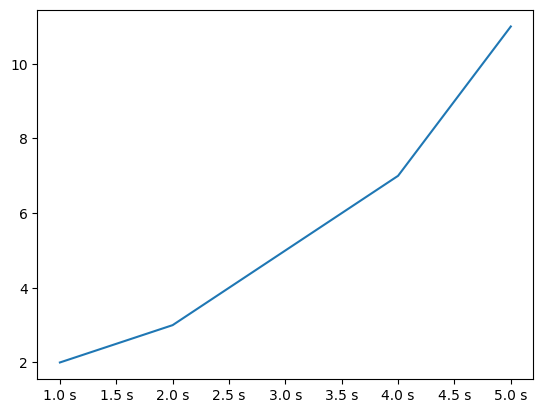

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 一些示例数据
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

fig, ax = plt.subplots()
ax.plot(x, y)

# 创建一个函数，它接收 x 轴的刻度值，并返回刻度值后面添加单位的标签
def format_func(value, tick_number):
    return f'{value} s'

# 创建一个 FuncFormatter 对象，并将我们刚才创建的函数作为参数传入
formatter = ticker.FuncFormatter(format_func)

# 使用我们创建的 formatter 来格式化 x 轴的标签
ax.xaxis.set_major_formatter(formatter)

plt.show()

In [12]:
import pandas as pd
import numpy as np
data=pd.read_feather("/home/mlqin/qml/HFT_06_17/data/BTCTUSD/df.feather")
print(len(data))
print(data.timestamp.tolist()[0])
print(data.timestamp.tolist()[-1])

4057140
2023-03-30 01:01:00
2023-05-15 23:59:59


In [13]:
data=pd.read_feather("/home/mlqin/qml/HFT_06_17/data/BTCUSDT/df.feather")
print(len(data))
print(data.timestamp.tolist()[0])
print(data.timestamp.tolist()[-1])

3884400
2022-09-01 01:00:00
2022-10-15 23:59:59


In [14]:
data=pd.read_feather("/home/mlqin/qml/HFT_06_17/data/ETHUSDT/df.feather")
print(len(data))
print(data.timestamp.tolist()[0])
print(data.timestamp.tolist()[-1])

3970800
2022-05-01 01:00:00
2022-06-15 23:59:59


In [15]:
data=pd.read_feather("/home/mlqin/qml/HFT_06_17/data/GALAUSDT/df.feather")
print(len(data))
print(data.timestamp.tolist()[0])
print(data.timestamp.tolist()[-1])

3970740
2022-07-01 01:01:00
2022-08-15 23:59:59


In [1]:
class myclass:
    def __init__(self,a,b):
        self.a=a
        self.b=b
        print("self:")
    @staticmethod
    def st_sum(x,y):
        return x+y
    def sum(x,y):
        return x+y
    

In [2]:
myclass.st_sum(1,2)

3

In [3]:
myclass.sum(1,2)

3

In [1]:
import numpy as np
import pandas as pd
